# Experiment 1: Topic Classification
## Source Task: yinetal
## Target Task: huffpost

In [1]:
from flair.models.text_classification_model import TARSClassifier
from flair.data import Sentence
import pandas as pd 
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# GRAKA auswählen
import flair, torch
flair.device = torch.device('cuda:1') 

# Labelbezeichner: Oneword

In [3]:
# base_path = '/vol/fob-vol7/nebenf19/samahakk'
base_path = !pwd
base_path = base_path[0] + '/masterarbeit_experiment1'

In [4]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_huffpost/oneword/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_yin/oneword/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "travel",
    "technology",
    "wellness",
    "women",
    "parents",
    "business",
    "weddings",
    "fashion",
    "entertainment",
    "science",
    "divorce",
    "crime",
    "religion",
    "sports",
    "politics",
    "comedy",
]

for sentence in text:
    try:
        sequence = Sentence(sentence)
    except:
        sequence = Sentence('test test test')
        
    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)


# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-07-30 21:37:42,798 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment1/topic_yin/oneword/model/best-model.pt
init TARS
Sentence: "Bill Clinton : Austerity Ca n't Solve Debt Problem ( VIDEO )"   [− Tokens: 12  − Sentence-Labels: {'label': [politics (0.7926)]}]
Sentence: "Learn Investing Tips From Property Transfers"   [− Tokens: 6  − Sentence-Labels: {'label': [business (0.961)]}]
Sentence: "How Has Women 's Entrepreneurship Day Made a Real Difference ?"   [− Tokens: 11  − Sentence-Labels: {'label': [business (0.9254)]}]
Sentence: "This Enlightened CEO Takes Every Friday Off And You Should , Too"   [− Tokens: 12  − Sentence-Labels: {'label': [business (0.9743)]}]
Sentence: "The 15 Greatest Job Titles In The History Of Mankind ( PHOTOS )"   [− Tokens: 13  − Sentence-Labels: {'label': [business (0.7981)]}]
Sentence: "Rethinking Values in the Workplace"   [− Tokens: 5  − Sentence-Labels: {'label': [business (0.7554)]}]
Sentence: "How So Many Entrepreneurs are Making 

Sentence: "British American Tobacco Agrees To Buy Rival Reynolds For $ 49 Billion"   [− Tokens: 12  − Sentence-Labels: {'label': [sports (0.409)]}]
Sentence: "9 Of The Boldest Buildings In The History Of The World ’s Fair"   [− Tokens: 13  − Sentence-Labels: {'label': [science (0.9051)]}]
Sentence: "An Anonymous Rich Person Is Hiding Money All Around San Francisco"   [− Tokens: 11  − Sentence-Labels: {'label': [business (0.8336)]}]
Sentence: "The Worst States To Be Unemployed In"   [− Tokens: 7  − Sentence-Labels: {'label': [politics (0.9073)]}]
Sentence: "Mattress Store To Reopen ' As Soon As Possible ' After Absurdly Offensive 9 / 11 Ad"   [− Tokens: 17  − Sentence-Labels: {'label': [business (0.8599)]}]
Sentence: "Sabra Recalls Hummus Products Over Listeria Concern , Again"   [− Tokens: 9  − Sentence-Labels: {'label': [wellness (0.824)]}]
Sentence: "The Beginner 's Guide to Invoicing + Infographic"   [− Tokens: 8  − Sentence-Labels: {'label': [technology (0.7421)]}]
Sentence: "10 Be

Sentence: "Bill Maher Says Socialism Created America 's Successful Middle Class"   [− Tokens: 10  − Sentence-Labels: {'label': [politics (0.9777)]}]
Sentence: "Trevor Noah : 2016 Is ‘ The First Year That Just Refused To Stop’"   [− Tokens: 14  − Sentence-Labels: {'label': [sports (0.7335)]}]
Sentence: "Colbert Ca n't Hide His Pleasure After Learning Hannity Was Cohen 's Mystery Client"   [− Tokens: 14  − Sentence-Labels: {'label': [entertainment (0.9161)]}]
Sentence: "Someone Rewrote The Beatles' ' Sgt. Pepper ' Album As A ' Star Wars' Parody"   [− Tokens: 15  − Sentence-Labels: {'label': [entertainment (0.9754)]}]
Sentence: "In Memoriam Of Your Summer Fling , Rosé ( 99 Days Old )"   [− Tokens: 13  − Sentence-Labels: {'label': [parents (0.6246)]}]
Sentence: "Stephen Colbert Pokes Holes In Trump 's Abstinence-Only Sex Education Agenda"   [− Tokens: 11  − Sentence-Labels: {'label': [politics (0.9856)]}]
Sentence: "Funny Or Die Takes On Tom Petty , Sam Smith Controversy"   [− Tokens: 11  

Sentence: "Arianna Huffington Stops By ' Saturday Night Live ' To Talk Women 's News ( VIDEO )"   [− Tokens: 17  − Sentence-Labels: {'label': [entertainment (0.8688)]}]
Sentence: "Stolen Moment of the Week : 50 First Jokes"   [− Tokens: 9  − Sentence-Labels: {'label': [comedy (0.9283)]}]
Sentence: "' SNL ' Mocks Just How Desperate Hillary Clinton Is To Be A New Yorker"   [− Tokens: 15  − Sentence-Labels: {'label': [politics (0.9538)]}]
Sentence: "Watch Ben Stiller And Jimmy Fallon Hit On Each Other"   [− Tokens: 10  − Sentence-Labels: {'label': [sports (0.9645)]}]
Sentence: "Jimmy Fallon Tees Off On PGA Golfers"   [− Tokens: 7  − Sentence-Labels: {'label': [sports (0.995)]}]
Sentence: "The Best Political Jokes Of The Week : Letterman On GOP Convention Hurricane , Leno On Todd Akin & More ( VIDEO )"   [− Tokens: 23  − Sentence-Labels: {'label': [politics (0.9493)]}]
Sentence: "Kate McKinnon 's Creepy Kellyanne Conway Goes Fatal Attraction On ' SNL '"   [− Tokens: 13  − Sentence-Labels: 

Sentence: "Woman Killed By Stone That Fell From Church Gargoyle"   [− Tokens: 9  − Sentence-Labels: {'label': [religion (0.4844)]}]
Sentence: "This Is Why You Do n't Mess With The Garbage Man"   [− Tokens: 11  − Sentence-Labels: {'label': [entertainment (0.8608)]}]
Sentence: "10 Injured As Taxi Hits Pedestrians Near Boston Airport : Police"   [− Tokens: 11  − Sentence-Labels: {'label': [travel (0.7857)]}]
Sentence: "Cops Charge Man In Arizona Highway Shootings"   [− Tokens: 7  − Sentence-Labels: {'label': [sports (0.9489)]}]
Sentence: "Man Buried Alive In Sand Tunnel Collapse Was ' A Perfect Son ' : Family"   [− Tokens: 15  − Sentence-Labels: {'label': [science (0.9277)]}]
Sentence: "Life Sentence For Dad Who Threw Daughter From Cliff"   [− Tokens: 9  − Sentence-Labels: {'label': [parents (0.7202)]}]
Sentence: "Knife ' Found ' At O.J . Simpson 's Former Home Ruled Out As 1994 Murder Weapon"   [− Tokens: 17  − Sentence-Labels: {'label': [entertainment (0.9438)]}]
Sentence: "Prep School 

Sentence: "Divorce And Kids : Why I Love Being A Single Parent"   [− Tokens: 11  − Sentence-Labels: {'label': [parents (0.8611)]}]
Sentence: "Custody And Its Different Components"   [− Tokens: 5  − Sentence-Labels: {'label': [science (0.8691)]}]
Sentence: "Adrienne Maloof Divorce From Paul Nassif Is Settled"   [− Tokens: 8  − Sentence-Labels: {'label': [divorce (0.9319)]}]
Sentence: "Dating After Divorce : 3 Things To Know Before Dating A Divorced Man"   [− Tokens: 13  − Sentence-Labels: {'label': [parents (0.9281)]}]
Sentence: "Pot Smoking Vs. Medical Marijuana : What Are The Implications In A Custody Dispute ?"   [− Tokens: 15  − Sentence-Labels: {'label': [politics (0.5992)]}]
Sentence: "5 Tips For Recently Married Or Divorced Taxpayers With A Name Change"   [− Tokens: 12  − Sentence-Labels: {'label': [business (0.8154)]}]
Sentence: "10 Tips For Navigating The Holidays With Your Stepfamily"   [− Tokens: 9  − Sentence-Labels: {'label': [travel (0.7639)]}]
Sentence: "Pet Reunion Turns

Sentence: "Three Charts Show What ' Ghostbusters' Means For Young Girls"   [− Tokens: 10  − Sentence-Labels: {'label': [entertainment (0.9409)]}]
Sentence: "Carrie Fisher 's Famous Dog Tweets His Heartbreaking Goodbyes"   [− Tokens: 9  − Sentence-Labels: {'label': [entertainment (0.901)]}]
Sentence: "Gwen Stefani Shares Behind-The-Scenes Look At New Video"   [− Tokens: 8  − Sentence-Labels: {'label': [entertainment (0.9887)]}]
Sentence: "Listen To Part Of Coldplay 's New Song Featuring Beyoncé And Blue Ivy"   [− Tokens: 13  − Sentence-Labels: {'label': [entertainment (0.9222)]}]
Sentence: "Margaret Atwood Wants Drake To Make A Cameo In ' Handmaid 's Tale '"   [− Tokens: 14  − Sentence-Labels: {'label': [entertainment (0.9513)]}]
Sentence: "Go See ' 20th Century Women ' This Weekend To Support Planned Parenthood"   [− Tokens: 13  − Sentence-Labels: {'label': [women (0.8204)]}]
Sentence: "' The Walking Dead ' Characters Are Killing Zombies All Wrong"   [− Tokens: 11  − Sentence-Labels: {

Sentence: "Demi Lovato Is Hit With A Truly Aggressive Amount Of Slime At Kids' Choice Awards"   [− Tokens: 15  − Sentence-Labels: {'label': [entertainment (0.8798)]}]
Sentence: "Meet The Journalist Who Befriended A Shy Ernest Hemingway In A Clip From ' Papa : Hemingway In Cuba '"   [− Tokens: 20  − Sentence-Labels: {'label': [entertainment (0.5415)]}]
Sentence: "This Is What It Was Like To Be At Kanye 's Yeezy Season 3 Show"   [− Tokens: 15  − Sentence-Labels: {'label': [entertainment (0.9854)]}]
Sentence: "Pregnant Kourtney Kardashian Rocks Tight Lacy Jumpsuit"   [− Tokens: 7  − Sentence-Labels: {'label': [entertainment (0.7724)]}]
Sentence: "The Rock Ca n’t Get Down With DJ Khaled ’s Refusal To Give Oral Sex"   [− Tokens: 15  − Sentence-Labels: {'label': [entertainment (0.8226)]}]
Sentence: "Aisle View : Ghosts at BAM"   [− Tokens: 6  − Sentence-Labels: {'label': [entertainment (0.6638)]}]
Sentence: "' The Dark Knight Rises' Reviews , Green Day 's ' Oh Love ,' Matisyahu & More : The 

Sentence: "Space Robot Arm Tech Could Help Surgeons Operate On Kids"   [− Tokens: 10  − Sentence-Labels: {'label': [wellness (0.7087)]}]
Sentence: "Mom Of 5 Beautifully Explains Why Parents Should Take Time For Themselves"   [− Tokens: 12  − Sentence-Labels: {'label': [parents (0.8679)]}]
Sentence: "I Barged Into A Room Full Of Trump Supporters . Here ’s What Happened ."   [− Tokens: 15  − Sentence-Labels: {'label': [politics (0.99)]}]
Sentence: "Being Calm and Mindful for Your Child"   [− Tokens: 7  − Sentence-Labels: {'label': [parents (0.7255)]}]
Sentence: "You Did Not Lose a Thing"   [− Tokens: 6  − Sentence-Labels: {'label': [business (0.7654)]}]
Sentence: "9 Things I 'm Not Grateful For As A New Mom"   [− Tokens: 11  − Sentence-Labels: {'label': [parents (0.8508)]}]
Sentence: "Why Mothers Are So Special"   [− Tokens: 5  − Sentence-Labels: {'label': [parents (0.8238)]}]
Sentence: "Gifts From the Father I Hardly Knew"   [− Tokens: 7  − Sentence-Labels: {'label': [parents (0.7678)]}

Sentence: "Conceiving Our Chosen Family"   [− Tokens: 4  − Sentence-Labels: {'label': [parents (0.6279)]}]
Sentence: "Emilio Hoffman 's Death -- Sorry Is NOT Good Enough"   [− Tokens: 10  − Sentence-Labels: {'label': [comedy (0.8728)]}]
Sentence: "65 Halloween Costumes For Families Who Love Dressing Up Together"   [− Tokens: 10  − Sentence-Labels: {'label': [entertainment (0.8809)]}]
Sentence: "Why These Muslim Kids Are Scared Of A Donald Trump Presidency"   [− Tokens: 11  − Sentence-Labels: {'label': [politics (0.9047)]}]
Sentence: "9 Reasons Parents Are Thankful For Teachers"   [− Tokens: 7  − Sentence-Labels: {'label': [parents (0.6928)]}]
Sentence: "Young Dad Pens Emotional Letter About Life As A Single Parent"   [− Tokens: 11  − Sentence-Labels: {'label': [parents (0.7557)]}]
Sentence: "It ’s Just 15 Minutes To A Grown-Up , But Not To Kids"   [− Tokens: 13  − Sentence-Labels: {'label': [entertainment (0.7943)]}]
Sentence: "A Lesson From My Grandma In The Miracle Of Life"   [− Toke

Sentence: "Marco Rubio Wants More Anti-ISIS Propaganda"   [− Tokens: 6  − Sentence-Labels: {'label': [politics (0.973)]}]
Sentence: "These 3 Factors Will Determine The Iowa Caucus Outcomes"   [− Tokens: 9  − Sentence-Labels: {'label': [politics (0.9842)]}]
Sentence: "How FBI Director Comey Altered The Outcome Of The 2016 Presidential Election"   [− Tokens: 12  − Sentence-Labels: {'label': [politics (0.9736)]}]
Sentence: "Facing Backlash , VA Reverses Cuts To Program Helping Homeless Vets : Report"   [− Tokens: 13  − Sentence-Labels: {'label': [business (0.5498)]}]
Sentence: "Lawyer Who Helped Take Down Prop 8 Joins Fight Against Anti-LGBT Law"   [− Tokens: 12  − Sentence-Labels: {'label': [politics (0.931)]}]
Sentence: "Here 's Why It 's A Problem That Donald Trump Is Reciting ' The Snake ' Again"   [− Tokens: 17  − Sentence-Labels: {'label': [politics (0.9111)]}]
Sentence: "100 Top CEOs Urge DACA Action In Open Letter To Congress"   [− Tokens: 11  − Sentence-Labels: {'label': [busines

Sentence: "Daily Meditation : Be Still"   [− Tokens: 5  − Sentence-Labels: {'label': [wellness (0.9205)]}]
Sentence: "Obama Rejects Iran Deal Critics' Charges Of Anti-Semitism"   [− Tokens: 8  − Sentence-Labels: {'label': [politics (0.9389)]}]
Sentence: "At Mexico-U.S. Border , Pope Francis Decries Suffering of Migrants"   [− Tokens: 10  − Sentence-Labels: {'label': [politics (0.9281)]}]
Sentence: "Eid In Gaza And The West Bank : ' We Do Not Want To Celebrate Anything , Our People Are Dying '"   [− Tokens: 22  − Sentence-Labels: {'label': [politics (0.9643)]}]
Sentence: "Extreme Measures Americans Are Already Taking Before Pope Visit"   [− Tokens: 9  − Sentence-Labels: {'label': [politics (0.9242)]}]
Sentence: "When Patriotism Becomes Idolatry"   [− Tokens: 4  − Sentence-Labels: {'label': [politics (0.9253)]}]
Sentence: "I Do n’t Believe In God , But I F ** king Love Holiday Music"   [− Tokens: 15  − Sentence-Labels: {'label': [religion (0.909)]}]
Sentence: "These ' Buddhist Monks' Are

Sentence: "Neil deGrasse Tyson Describes The ' Morbidly Funny ' Death You 'd Experience In A Black Hole"   [− Tokens: 17  − Sentence-Labels: {'label': [sports (0.8853)]}]
Sentence: "Space Robot ' Kirobo ' Launched On Japan Rocket Toward International Space Station"   [− Tokens: 13  − Sentence-Labels: {'label': [science (0.9654)]}]
Sentence: "Zodiacal Light : Rare Celestial Phenomenon Tied To Space Dust May Soon Be Visible In Night Sky"   [− Tokens: 17  − Sentence-Labels: {'label': [science (0.9775)]}]
Sentence: "Ophiucus Constellation Visible In Summer Sky To Skywatchers Around World"   [− Tokens: 10  − Sentence-Labels: {'label': [science (0.9625)]}]
Sentence: "NASA Delays Spacewalk After Spacesuit Issue Arises"   [− Tokens: 7  − Sentence-Labels: {'label': [science (0.8923)]}]
Sentence: "Royal Garden Of Ramat Rahel In Biblical Kingdom Of Judah Reconstructed"   [− Tokens: 11  − Sentence-Labels: {'label': [religion (0.83)]}]
Sentence: "Brain Scans Point To New Way To Spot Pedophiles"   [

Sentence: "ESA Lander Prepares For Historic Mars Landing"   [− Tokens: 7  − Sentence-Labels: {'label': [science (0.9272)]}]
Sentence: "This Ghostly Fish Has Never Been Seen Alive Before . Until Now ."   [− Tokens: 13  − Sentence-Labels: {'label': [science (0.8997)]}]
Sentence: "Alien Life Unlikely To Survive Around Dying Stars In Shifting Habitable Zones , Study Suggests"   [− Tokens: 15  − Sentence-Labels: {'label': [science (0.9737)]}]
Sentence: "Mars One , Manned Mission Planned For Red Planet , Gets First Sponsors"   [− Tokens: 13  − Sentence-Labels: {'label': [science (0.976)]}]
Sentence: "' Sesame Street ' Study Uses Brain Scans To Show Program 's Effect On Nerve Cells In Children , Adults"   [− Tokens: 20  − Sentence-Labels: {'label': [science (0.9573)]}]
Sentence: "Prehistoric Flamingo Nest , Eggs Discovered In Spain"   [− Tokens: 8  − Sentence-Labels: {'label': [science (0.966)]}]
Sentence: "Lucid Dreaming : New Horizons for Research"   [− Tokens: 7  − Sentence-Labels: {'label

Sentence: "Salary Cap Kings : Dwight Freeney , Peyton Manning Among NFL Players With Largest Cap Number"   [− Tokens: 16  − Sentence-Labels: {'label': [sports (0.9945)]}]
Sentence: "Freaky Diving Video Is The Greatest GIF From Rio 2016 So Far"   [− Tokens: 12  − Sentence-Labels: {'label': [sports (0.9872)]}]
Sentence: "' Do n't Cry for Us , Argentina ' as Powerhouse Germany Is First European Team to Win World Cup in the Americas"   [− Tokens: 23  − Sentence-Labels: {'label': [sports (0.9987)]}]
Sentence: "Cleveland Indians Set Record For Longest Winning Streak In Over A Century"   [− Tokens: 12  − Sentence-Labels: {'label': [sports (0.9957)]}]
Sentence: "Serena Williams Desperately Seeks Advice For Her Teething Baby"   [− Tokens: 9  − Sentence-Labels: {'label': [entertainment (0.9131)]}]
Sentence: "Cowboys' Decal Proves Roger Goodell Is A Joke"   [− Tokens: 8  − Sentence-Labels: {'label': [comedy (0.9417)]}]
Sentence: "Jen Welter To Become First Female Coach In NFL With Arizona Cardina

Sentence: "There Wo n’t Be Any Annoying Daily Fantasy Sports Ads During March Madness"   [− Tokens: 13  − Sentence-Labels: {'label': [sports (0.9733)]}]
Sentence: "Are the Cardinals Really the Best Organization in Baseball ?"   [− Tokens: 10  − Sentence-Labels: {'label': [sports (0.9978)]}]
Sentence: "Greg Hardy Explodes On Cowboys Sideline But Goes Quiet Postgame"   [− Tokens: 10  − Sentence-Labels: {'label': [sports (0.9935)]}]
Sentence: "11 Moments From The 2016 All-Star Game That Showcase What We Love About The NBA"   [− Tokens: 15  − Sentence-Labels: {'label': [sports (0.9976)]}]
Sentence: "You Ca n't Study College Coaches Without Looking at the Players"   [− Tokens: 11  − Sentence-Labels: {'label': [sports (0.9908)]}]
Sentence: "Seattle Star Megan Rapinoe Blasts Soccer 's World Body As ' Old , Male And Stale '"   [− Tokens: 17  − Sentence-Labels: {'label': [sports (0.9959)]}]
Sentence: "Kansas , Purdue Battle In NCAA Tournament Third Round [ Predict ]"   [− Tokens: 12  − Sentence

Sentence: "I Let My Nana Dress Me And I 've Never Gotten So Many Compliments"   [− Tokens: 14  − Sentence-Labels: {'label': [fashion (0.8724)]}]
Sentence: "THIS Is The Most Clever Way To Wear Your Scarves"   [− Tokens: 10  − Sentence-Labels: {'label': [fashion (0.8281)]}]
Sentence: "Guys , Your New York Fashion Week Has Arrived"   [− Tokens: 9  − Sentence-Labels: {'label': [fashion (0.9424)]}]
Sentence: "25 Throw-On-And-Go Skirts For Every Occasion"   [− Tokens: 6  − Sentence-Labels: {'label': [fashion (0.9448)]}]
Sentence: "Amanda Seyfried Shows How It 's Done On The Best-Dressed List"   [− Tokens: 11  − Sentence-Labels: {'label': [entertainment (0.8816)]}]
Sentence: "Perfect Party Dresses For Your Body Type"   [− Tokens: 7  − Sentence-Labels: {'label': [wellness (0.8107)]}]
Sentence: "What Annoys Me About Birchbox"   [− Tokens: 5  − Sentence-Labels: {'label': [sports (0.8989)]}]
Sentence: "Rihanna Declares Her Love For New York With Giant Heart-Shaped Fur Coat"   [− Tokens: 12  − Sen

Sentence: "Netflix Is Getting Rid Of An Easy Way To Watch Blocked Content"   [− Tokens: 12  − Sentence-Labels: {'label': [technology (0.7609)]}]
Sentence: "Instagram Rolls Out Focus Feature That Rivals iPhone Portrait Mode"   [− Tokens: 10  − Sentence-Labels: {'label': [technology (0.8847)]}]
Sentence: "iPhone 5 : It 's Morning in Technology Land"   [− Tokens: 9  − Sentence-Labels: {'label': [entertainment (0.604)]}]
Sentence: "The Scientific , Data-Driven Guide To Online Dating"   [− Tokens: 8  − Sentence-Labels: {'label': [parents (0.4251)]}]
Sentence: "Use Twitter Like A Pro With These Simple Keyboard Shortcuts"   [− Tokens: 10  − Sentence-Labels: {'label': [technology (0.629)]}]
Sentence: "Tim Cook Was Originally Opposed To Suing Samsung"   [− Tokens: 8  − Sentence-Labels: {'label': [politics (0.8503)]}]
Sentence: "WhatsApp Co-Founder To Leave Company Amid Disagreements With Facebook"   [− Tokens: 9  − Sentence-Labels: {'label': [business (0.9011)]}]
Sentence: "These First Tweets W

Sentence: "Larry King And Other Celebrities Make ' StarbucksDrakeHands' Videos"   [− Tokens: 9  − Sentence-Labels: {'label': [entertainment (0.7281)]}]
Sentence: "New App Helps Iranians Dodge ' Morality Police '"   [− Tokens: 9  − Sentence-Labels: {'label': [politics (0.9756)]}]
Sentence: "Why Are There Still So Few Women In Science ?"   [− Tokens: 10  − Sentence-Labels: {'label': [science (0.9475)]}]
Sentence: "Sony Xperia P , Xperia U Announced At Mobile World Congress"   [− Tokens: 11  − Sentence-Labels: {'label': [technology (0.9154)]}]
Sentence: "Twitter Pledges To Fix Its Most Annoying Features"   [− Tokens: 8  − Sentence-Labels: {'label': [entertainment (0.5231)]}]
Sentence: "FBI Might Withhold Secret Method Of Unlocking iPhone From Apple"   [− Tokens: 10  − Sentence-Labels: {'label': [technology (0.9508)]}]
Sentence: "Why Twitter 's New ' Like ' Button Is A Big Deal"   [− Tokens: 12  − Sentence-Labels: {'label': [fashion (0.4501)]}]
Sentence: "The FBI Could Gain Unprecedented A

Sentence: "Never Forget Your Roots"   [− Tokens: 4  − Sentence-Labels: {'label': [religion (0.6508)]}]
Sentence: "5 Amazing Libraries You Must Visit"   [− Tokens: 6  − Sentence-Labels: {'label': [science (0.4433)]}]
Sentence: "Love Letters : Park City"   [− Tokens: 5  − Sentence-Labels: {'label': [business (0.4383)]}]
Sentence: "PHOTOS : Creepy Abandoned Theme Parks"   [− Tokens: 6  − Sentence-Labels: {'label': [entertainment (0.9266)]}]
Sentence: "Chilling Out with the Great Gods on Samothrace : Natterings from Northern Greece on the Looney Front , Part 7"   [− Tokens: 20  − Sentence-Labels: {'label': [religion (0.8299)]}]
Sentence: "Make the Most of the Coast : A California Getaway to Remember"   [− Tokens: 12  − Sentence-Labels: {'label': [sports (0.895)]}]
Sentence: "Tourist FAILS Of The Day"   [− Tokens: 5  − Sentence-Labels: {'label': [business (0.6291)]}]
Sentence: "Valentine 's Day in London : 6 Ideas We Love"   [− Tokens: 10  − Sentence-Labels: {'label': [religion (0.6652)]}]


Sentence: "' Call Me Maybe ' Wedding Flash Mob Gets All The Guests Dancing ( VIDEO )"   [− Tokens: 16  − Sentence-Labels: {'label': [entertainment (0.9141)]}]
Sentence: "Amber Rose Twerks In A Wedding Dress The Night Before Her Nuptials ( VIDEO )"   [− Tokens: 15  − Sentence-Labels: {'label': [entertainment (0.947)]}]
Sentence: "We 've Had 15 Weddings - And We 'll Carry On Getting Married Again Every Year"   [− Tokens: 16  − Sentence-Labels: {'label': [weddings (0.9511)]}]
Sentence: "Couple Turns Rom-Com Clichés Into Funny Engagement Photos"   [− Tokens: 8  − Sentence-Labels: {'label': [parents (0.824)]}]
Sentence: "Pinterest-Addicted Brides"   [− Tokens: 2  − Sentence-Labels: {'label': [entertainment (0.886)]}]
Sentence: "11 Things Women Really Want From Wedding Night Sex"   [− Tokens: 9  − Sentence-Labels: {'label': [weddings (0.8701)]}]
Sentence: "Love In Marriage : Long-Term Love May Not Be Uncommon , Study Says"   [− Tokens: 13  − Sentence-Labels: {'label': [divorce (0.9337)]}]
Se

Sentence: "Wedding Dress Discount : Bridal Event Helps Brides With Postage Stamps"   [− Tokens: 11  − Sentence-Labels: {'label': [weddings (0.828)]}]
Sentence: "Marriage Advice : My Husband Told Me To Flirt With Other Men"   [− Tokens: 12  − Sentence-Labels: {'label': [women (0.8918)]}]
Sentence: "Justin Long Describes The Wedding ' Test ' He 'd Give His Future Fiancee"   [− Tokens: 14  − Sentence-Labels: {'label': [parents (0.9436)]}]
Sentence: "Signs He 's Never Going to Marry You ( And Why You Should Thank Him )"   [− Tokens: 16  − Sentence-Labels: {'label': [divorce (0.7618)]}]
Sentence: "Cheap Wedding Dresses - Affordable Dress Styles 2013"   [− Tokens: 8  − Sentence-Labels: {'label': [fashion (0.9467)]}]
Sentence: "Wedding Day Stress : 3 Ways To Calm Down Before Tying The Knot"   [− Tokens: 13  − Sentence-Labels: {'label': [wellness (0.7132)]}]
Sentence: "Get Over Your Fear Of Not Being Good Enough ! ( VIDEO )"   [− Tokens: 13  − Sentence-Labels: {'label': [entertainment (0.8584)

Sentence: "Kettlebells : New Go-To Strength Workout For Women ?"   [− Tokens: 9  − Sentence-Labels: {'label': [wellness (0.9778)]}]
Sentence: "The No Drama Guide"   [− Tokens: 4  − Sentence-Labels: {'label': [entertainment (0.935)]}]
Sentence: "Where Does the Sky Begin ?"   [− Tokens: 6  − Sentence-Labels: {'label': [science (0.9697)]}]
Sentence: "Austin , Abraham and Happiness , South by Southwest"   [− Tokens: 9  − Sentence-Labels: {'label': [religion (0.862)]}]
Sentence: "Better Pain Management Is Essential for Reducing Addiction to Prescription Painkillers"   [− Tokens: 11  − Sentence-Labels: {'label': [wellness (0.9663)]}]
Sentence: "Surgeon General Koop : The Legacy of a Health Warrior"   [− Tokens: 10  − Sentence-Labels: {'label': [politics (0.645)]}]
Sentence: "The Tissue Controversy : Tears in Hospitals"   [− Tokens: 7  − Sentence-Labels: {'label': [science (0.6343)]}]
Sentence: "Age Of Anxiety : Are We ' Pathologizing ' Normal Emotion ?"   [− Tokens: 12  − Sentence-Labels: {'

Sentence: "' Women Of This World Are Constantly Fighting Against A Hatred That Men Do Not See '"   [− Tokens: 17  − Sentence-Labels: {'label': [politics (0.5773)]}]
Sentence: "Women ’s Definitive Guide To Getting Political"   [− Tokens: 7  − Sentence-Labels: {'label': [politics (0.9632)]}]
Sentence: "Washington Will Now Alert Survivors When Domestic Abusers Try To Buy A Gun"   [− Tokens: 13  − Sentence-Labels: {'label': [parents (0.7817)]}]
Sentence: "The 20 Funniest Tweets From Women This Week"   [− Tokens: 8  − Sentence-Labels: {'label': [women (0.7667)]}]
Sentence: "My Niece Has Cancer And I 'm Ticked About It"   [− Tokens: 10  − Sentence-Labels: {'label': [wellness (0.8013)]}]
Sentence: "The Woman Behind MyFitnessPal Says If You Do n't See A Female Role Model , Maybe It Should Be You"   [− Tokens: 20  − Sentence-Labels: {'label': [entertainment (0.6977)]}]
Sentence: "8 Ruth Bader Ginsburg Quotes To Celebrate 82 Notorious Years"   [− Tokens: 10  − Sentence-Labels: {'label': [sports 

In [5]:
print(report)

               precision    recall  f1-score   support

     business       0.35      0.44      0.39       107
       comedy       0.16      0.07      0.09       120
        crime       0.74      0.32      0.45       100
      divorce       0.68      0.30      0.42        83
entertainment       0.26      0.72      0.38       103
      fashion       0.66      0.27      0.38       108
      parents       0.38      0.35      0.37       105
     politics       0.30      0.76      0.43        88
     religion       0.58      0.54      0.56        95
      science       0.55      0.71      0.62       114
       sports       0.39      0.79      0.53       110
   technology       0.78      0.39      0.52       102
       travel       0.65      0.15      0.24       102
     weddings       0.90      0.27      0.41       101
     wellness       0.38      0.38      0.38        89
        women       0.45      0.26      0.33        92

     accuracy                           0.42      1619
    macr

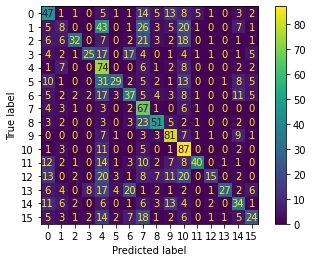

In [6]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Interpretation

In [7]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_huffpost/interpretation/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_yin/interpretation/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "this text is about travel",
    "this text is about technology",
    "this text is about wellness",
    "this text is about women",
    "this text is about parents",
    "this text is about business",
    "this text is about weddings",
    "this text is about fashion",
    "this text is about entertainmen,the attention",
    "this text is about science",
    "this text is about divorce",
    "this text is about crime",
    "this text is about religion",
    "this text is about sports",
    "this text is about politics",
    "this text is about comedy",
]

for sentence in text:
    sequence = Sentence(sentence)

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)
    print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-07-30 21:38:15,786 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment1/topic_yin/interpretation/model/best-model.pt
init TARS
Sentence: "Bill Clinton : Austerity Ca n't Solve Debt Problem ( VIDEO )"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about business (0.9374)]}]
this text is about business
Sentence: "Learn Investing Tips From Property Transfers"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about business (0.989)]}]
this text is about business
Sentence: "How Has Women 's Entrepreneurship Day Made a Real Difference ?"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about business (0.9893)]}]
this text is about business
Sentence: "This Enlightened CEO Takes Every Friday Off And You Should , Too"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about business (0.9958)]}]
this text is about business
Sentence: "The 15 Greatest Job Titles In The History Of Mankind ( PHOTOS )"   [− Tokens: 13  − Sentence-Labels:

Sentence: "How Successful People Handle Toxic People"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about business (0.9468)]}]
this text is about business
Sentence: "I 'm Buying a Wristable"   [− Tokens: 5  − Sentence-Labels: {'label': [this text is about technology (0.9292)]}]
this text is about technology
Sentence: "Did Black Friday Boycotts Have An Impact ?"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about politics (0.9756)]}]
this text is about politics
Sentence: "Conversational Courage : It 's Putting Your Intelligence Into Action !"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about politics (0.5307)]}]
this text is about politics
Sentence: "The Art of Storytelling - 7 Lessons From Cartoonist Liza Donnelly"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about technology (0.8457)]}]
this text is about technology
Sentence: "Change Within to Create Change on the Outside"   [− Tokens: 8  − Sentence-Labels: {'label': [this text 

Sentence: "Tyler Perry 's Madea Meets ' Alex Cross' On Jamie Foxx ' SNL ' Episode ( VIDEO )"   [− Tokens: 18  − Sentence-Labels: {'label': [this text is about comedy (0.9863)]}]
this text is about comedy
Sentence: "Snow White Takes On Elsa In Fierce Disney Princess Rap Battle"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about business (0.9513)]}]
this text is about business
Sentence: "Photos From Donald Trump 's Reign Are Our Way Of Laughing Through The Pain"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about politics (0.9917)]}]
this text is about politics
Sentence: "Bill Murray Slays As The ' Bannon Cannon ' On ' Saturday Night Live '"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about comedy (0.9646)]}]
this text is about comedy
Sentence: "Bill Burr Hates Black Friday And You Should , Too"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about comedy (0.8635)]}]
this text is about comedy
Sentence: "Otter Gets Drink From Vendin

Sentence: "The Funniest 4th Of July Someecards ( PHOTOS )"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about business (0.7495)]}]
this text is about business
Sentence: "Conan Is One Of The First To Use Amazon 's Drone Delivery Service"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about entertainmen,the attention (0.9075)]}]
this text is about entertainmen,the attention
Sentence: "Dana Carvey Relives A Classic ' SNL ' Moment"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about fashion (0.7622)]}]
this text is about fashion
Sentence: "Jeffrey Ross As Joe Paterno : Comedian Attends Comedy Central Roast Of Roseanne Dressed As The Late Penn State Coach"   [− Tokens: 20  − Sentence-Labels: {'label': [this text is about comedy (0.9909)]}]
this text is about comedy
Sentence: "Jimmy Kimmel Proves All Men Are Creeps"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about comedy (0.955)]}]
this text is about comedy
Sentence: "' Full Frontal ' V

Sentence: "If Your Partner Gave You A Survey To Fill Out After Sex"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about women (0.7732)]}]
this text is about women
Sentence: "Jimmy Fallon 's Evolution Of Dad Dancing ( VIDEO )"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about comedy (0.9884)]}]
this text is about comedy
Sentence: "Bad Lip Reading Of Trash-Talkers Floyd Mayweather And Conor McGregor Gets Brutal"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about sports (0.9349)]}]
this text is about sports
Sentence: "We Inflated Too Many Balloons And Now The RNC Is Floating Away"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about science (0.6696)]}]
this text is about science
Sentence: "The Daily Szep - Those Other People"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about business (0.6071)]}]
this text is about business
Sentence: "Jimmy Fallon Loses It After On-Air Flub Of ' Baby Got Back '"   [− Tokens: 13  − Sen

Sentence: "19-Year-Old Arrested After Parents Found Shot Dead At Central Michigan University"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about crime (0.9888)]}]
this text is about crime
Sentence: "Wayne State University Police Officer Dies After Being Shot In The Head"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about crime (0.9901)]}]
this text is about crime
Sentence: "Madyson ' Maddy ' Middleton , 8 , Missing In California , Police Say"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about crime (0.9246)]}]
this text is about crime
Sentence: "' Officer Slam ' Threw Teen From Her Desk Over Cellphone , Lawyer Says"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about crime (0.9602)]}]
this text is about crime
Sentence: "Jury To Weigh If Pulse Shooter ’s Widow Is A Monster Or Just Married One"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about sports (0.9965)]}]
this text is about sports
Sentence: "Man Brought Gun

Sentence: "This City 's Pit Bull Ban Has Failed Miserably To Prevent Dog Bites"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about sports (0.9995)]}]
this text is about sports
Sentence: "San Bernardino Attacker 's Brother-In-Law Wonders If Killer Was Brainwashed"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about crime (0.9877)]}]
this text is about crime
Sentence: "Suspected Purse Snatcher Filmed Running Over , Killing Woman"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about crime (0.9823)]}]
this text is about crime
Sentence: "Snowboarder May Have Caused Montana Avalanche That Injured Three"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about sports (0.9996)]}]
this text is about sports
Sentence: "Woman Fatally Stabbed In New York , Baby Born At The Scene"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about crime (0.967)]}]
this text is about crime
Sentence: "SWAT Team Throws Grenade That Blows Up In Toddler 's F

Sentence: "Does A More Equal Marriage Mean Less Sex ?"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about politics (0.856)]}]
this text is about politics
Sentence: "Single Dad Enlists The Melbourne Demons Football Club For The Ultimate Birthday Gift"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about sports (0.9993)]}]
this text is about sports
Sentence: "Staying Calm When Kids Lose It During Divorce"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about divorce (0.865)]}]
this text is about divorce
Sentence: "Dating A Divorcé : Is It Better To Couple Up With A Man Who 's Already Been Married ?"   [− Tokens: 19  − Sentence-Labels: {'label': [this text is about divorce (0.9664)]}]
this text is about divorce
Sentence: "Sports , Politics and Divorce"   [− Tokens: 5  − Sentence-Labels: {'label': [this text is about weddings (0.5467)]}]
this text is about weddings
Sentence: "Cheating Women Expect To Be Spoiled By Their Affair Partners , According To N

Sentence: "Larkin Poe : How Megan and Rebecca Lovell Got Their Sister Act Together"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about comedy (0.9298)]}]
this text is about comedy
Sentence: "Watch U2 's Full Surprise Subway Performance"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about comedy (0.7095)]}]
this text is about comedy
Sentence: "Jay Z -- Activist for the 21st Century"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about politics (0.9168)]}]
this text is about politics
Sentence: "Tina Fey Has A Confession About Those ' 30 Rock’ Reboot Rumors"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about comedy (0.9871)]}]
this text is about comedy
Sentence: "Charlize Theron Explains How Her Mom Became Her Weed Dealer"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about business (0.8067)]}]
this text is about business
Sentence: "Jenna Fischer Says She Has n't Been Approached About ' The Office ' Revival"   [− Tokens:

Sentence: "Pregnant Kourtney Kardashian Rocks Tight Lacy Jumpsuit"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about sports (0.9837)]}]
this text is about sports
Sentence: "The Rock Ca n’t Get Down With DJ Khaled ’s Refusal To Give Oral Sex"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about comedy (0.7768)]}]
this text is about comedy
Sentence: "Aisle View : Ghosts at BAM"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about technology (0.7368)]}]
this text is about technology
Sentence: "' The Dark Knight Rises' Reviews , Green Day 's ' Oh Love ,' Matisyahu & More : The Week In Ouch"   [− Tokens: 22  − Sentence-Labels: {'label': [this text is about comedy (0.9738)]}]
this text is about comedy
Sentence: "5 Sylvester Stallone Movies Better Than Bullet to the Head"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about comedy (0.9897)]}]
this text is about comedy
Sentence: "In New Documentaries , Nora Ephron And Joan Rivers Rightfully 

Sentence: "Creating Work-life Balance As a Mother and Pediatric Oncologist"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about science (0.9323)]}]
this text is about science
Sentence: "It 's OK To Use The Word ' Hate '"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about technology (0.4072)]}]
this text is about technology
Sentence: "Space Robot Arm Tech Could Help Surgeons Operate On Kids"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about technology (0.8947)]}]
this text is about technology
Sentence: "Mom Of 5 Beautifully Explains Why Parents Should Take Time For Themselves"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about business (0.7741)]}]
this text is about business
Sentence: "I Barged Into A Room Full Of Trump Supporters . Here ’s What Happened ."   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about politics (0.9886)]}]
this text is about politics
Sentence: "Being Calm and Mindful for Your Child"   [− Toke

Sentence: "Dog Lets Baby Climb All Over Him , Continues Being This Little Man 's Best Friend"   [− Tokens: 16  − Sentence-Labels: {'label': [this text is about sports (0.7095)]}]
this text is about sports
Sentence: "7 Ways Potty Training Your Kid Is Like Getting An Advanced Degree"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about business (0.8714)]}]
this text is about business
Sentence: "This Little Girl Singing Adele Is Everyone Singing Adele"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about comedy (0.7394)]}]
this text is about comedy
Sentence: "How to Support Someone After a Stillbirth"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about business (0.7334)]}]
this text is about business
Sentence: "25 Cute And Cool School Supplies To Add To Your Shopping List"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about business (0.9102)]}]
this text is about business
Sentence: "10 Things I Learned in My First Year of Being a Dad"   

Sentence: "This Map Of Donald Trump 's Foreign Policy Would Be Funny If It Were n't So True"   [− Tokens: 17  − Sentence-Labels: {'label': [this text is about politics (0.9958)]}]
this text is about politics
Sentence: "Trump Voters Do n’t Blame Him For The Health Care Bill ’s Failure"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about politics (0.9716)]}]
this text is about politics
Sentence: "Thursday 's Morning Email : Trump Calls For NYC Terror Suspect To Face The Death Penalty"   [− Tokens: 16  − Sentence-Labels: {'label': [this text is about politics (0.9606)]}]
this text is about politics
Sentence: "Are We Welcome Entrepreneurs or Unwanted Criminals ?"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about business (0.9631)]}]
this text is about business
Sentence: "Woman Says Alabama Senate Nominee Roy Moore Sexually Assaulted Her When She Was 14"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about politics (0.9915)]}]
this text is about pol

Sentence: "President Barack Obama Backs Expanding Social Security"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about politics (0.9803)]}]
this text is about politics
Sentence: "Florida House Debates Porn , But Refuses To Discuss Assault Weapons"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about politics (0.6297)]}]
this text is about politics
Sentence: "McCain Calls Sony Hack An ' Act Of War '"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about technology (0.9638)]}]
this text is about technology
Sentence: "Flag That Flew Over Capitol On 9 / 11 Destroyed In Flight 93 Memorial Fire"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about politics (0.9609)]}]
this text is about politics
Sentence: "Why Bernie Sanders Is Best on Women 's Issues"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about comedy (0.954)]}]
this text is about comedy
Sentence: "The White House Creates ' Letters To President Obama ' Tumblr"   [− Toke

Sentence: "The Hobby Lobby Case Has Nothing to Do With Religious Freedom"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about politics (0.9857)]}]
this text is about politics
Sentence: "Moving Beyond Tribal Religion"   [− Tokens: 4  − Sentence-Labels: {'label': [this text is about religion (0.9617)]}]
this text is about religion
Sentence: "Neil deGrasse Tyson Speaking at Apostacon 2014"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about sports (0.9925)]}]
this text is about sports
Sentence: "Eight Days and 8 Delicious Gourmet Ways With Matzah"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about fashion (0.8888)]}]
this text is about fashion
Sentence: "Pope Francis , In Easter Address , Says ' Defenseless' Being Killed In Holy Land"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about religion (0.9921)]}]
this text is about religion
Sentence: "Faith Photos From The People 's Climate March"   [− Tokens: 8  − Sentence-Labels: {'label':

Sentence: "Manchester bomber was motivated to commit terrorism by hate preachers , not religion"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about politics (0.9859)]}]
this text is about politics
Sentence: "Would Jesus Accept Climate Science ?"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about science (0.9206)]}]
this text is about science
Sentence: "Man Between God and the Devil : Martin Luther and the Reclamation of Halloween"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about religion (0.9642)]}]
this text is about religion
Sentence: "Religious Freedom in Practicing the Platinum Rule"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about business (0.9621)]}]
this text is about business
Sentence: "' Happy ' Dancing Priests And Nuns Celebrate Double Canonization"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about religion (0.993)]}]
this text is about religion
Sentence: "What Is True Islam ?"   [− Tokens: 5  − Sen

Sentence: "Researchers Find Second U.S. Patient Infected With ' Superbug ' Gene"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about technology (0.7346)]}]
this text is about technology
Sentence: "Gladiators In London ? Decapitated Skulls Spotlight Brutal Ways Of Ancient Romans"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about religion (0.8322)]}]
this text is about religion
Sentence: "Space Aliens Are Already Here"   [− Tokens: 5  − Sentence-Labels: {'label': [this text is about science (0.8579)]}]
this text is about science
Sentence: "Hookworm Genome Sequenced , Raising Hopes Of Cures For Painful Infection"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about science (0.9819)]}]
this text is about science
Sentence: "The Crisis of Confidence in Medical Research"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about technology (0.8971)]}]
this text is about technology
Sentence: "Amazing Fossil Find Shows Bug Inside Lizard Inside Sn

Sentence: "Fairies , Witches and Astronauts"   [− Tokens: 5  − Sentence-Labels: {'label': [this text is about religion (0.8107)]}]
this text is about religion
Sentence: "Why you Get so Pumped up Watching Sports"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about sports (0.9176)]}]
this text is about sports
Sentence: "' Infant ' Alien Planet Discovery Shakes Up Ideas About How Worlds Form"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about science (0.9904)]}]
this text is about science
Sentence: "Extensive Coral Reef Found Hidden At The Mouth Of The Amazon River"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about science (0.9906)]}]
this text is about science
Sentence: "10,000 Young Toddlers Are on Stimulant Drugs for ADHD"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about crime (0.9427)]}]
this text is about crime
Sentence: "Crayfish Claws Can Fake Out Attackers , Cherax Dispar Research Shows"   [− Tokens: 11  − Sentence-Labels

Sentence: "Protesters Arrested After Rappelling NFL Stadium To Hang Banner"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about sports (0.999)]}]
this text is about sports
Sentence: "Chris Davis 50 Home Runs GIF : Watch Every HR Hit By Orioles Slugger"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about sports (0.9997)]}]
this text is about sports
Sentence: "Joseph Morgan Touchdown : Drew Brees Connects With WR For Amazing TD Against Buccaneers ( VIDEO )"   [− Tokens: 17  − Sentence-Labels: {'label': [this text is about sports (0.9998)]}]
this text is about sports
Sentence: "With The World Watching , Titans Take To The Pitch"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about sports (0.9986)]}]
this text is about sports
Sentence: "Predicting The 2014 NFL Season With Stats"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about sports (0.9998)]}]
this text is about sports
Sentence: "Salary Cap Kings : Dwight Freeney , Peyton Manning Am

Sentence: "Follow live : Colombia vs. Uruguay"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about sports (0.8931)]}]
this text is about sports
Sentence: "Global Soccer 's Backslapping , Backstabbing Backroom Deal-making Politics"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about sports (0.9996)]}]
this text is about sports
Sentence: "Team Canada Deserves A Podium Spot For This Olympic Bus Sing-Along"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about sports (0.9993)]}]
this text is about sports
Sentence: "Even ' Sesame Street ' Seems To Have Poked Fun At Deflategate"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about comedy (0.9771)]}]
this text is about comedy
Sentence: "Super BEANS ! !"   [− Tokens: 4  − Sentence-Labels: {'label': [this text is about science (0.7795)]}]
this text is about science
Sentence: "Russell Westbrook ’s Reaction To An Angry Fan Flipping Him Off Is Absolutely Perfect"   [− Tokens: 14  − Sentence-Labels

Sentence: "30 Times Women Proved Menswear Is n't Just For Men"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about fashion (0.8127)]}]
this text is about fashion
Sentence: "Leather And Lace Is n't Always A Winning Combination"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about fashion (0.7787)]}]
this text is about fashion
Sentence: "30 Cool Graphic Tees To Throw On For ANY Occasion"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about technology (0.6438)]}]
this text is about technology
Sentence: "Ciara Shows Off Baby Bump In A Skintight Black Gown At The AMAs"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about fashion (0.9563)]}]
this text is about fashion
Sentence: "Not Even Harry Styles Can Keep His Hands Out Of His Own Hair"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about fashion (0.906)]}]
this text is about fashion
Sentence: "Chrissy Teigen Somehow Makes The Braless Outfit Look So Damn Chic"   [− Tokens: 1

Sentence: "Check Out These Olympians Wearing Regular Clothes Like They 're Mortals Or Something"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about religion (0.7164)]}]
this text is about religion
Sentence: "6 Genius Ways To Save Money At Sephora"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about business (0.988)]}]
this text is about business
Sentence: "ASOS and GLAAD Paired Up To Create A Gender-Fluid Clothing Line"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about women (0.9481)]}]
this text is about women
Sentence: "The Best Things Under $ 500 From The September Issues"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about business (0.9722)]}]
this text is about business
Sentence: "16 Unexpected Ways To Use Coconut Oil"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about wellness (0.7982)]}]
this text is about wellness
Sentence: "Everyone On Twitter REALLY Likes October 3rd"   [− Tokens: 7  − Sentence-Labels: {'

Sentence: "Web Display Ad World 's Woes Reflected In Microsoft 's aQuantive Loss"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about technology (0.8632)]}]
this text is about technology
Sentence: "Twitter Cofounder Gets His Twitter Account Hacked"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about technology (0.4467)]}]
this text is about technology
Sentence: "Netflix 's Risky Strategy For ' House Of Cards'"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about business (0.9832)]}]
this text is about business
Sentence: "Netflix Is Getting Rid Of An Easy Way To Watch Blocked Content"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about technology (0.4589)]}]
this text is about technology
Sentence: "Instagram Rolls Out Focus Feature That Rivals iPhone Portrait Mode"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about technology (0.9626)]}]
this text is about technology
Sentence: "iPhone 5 : It 's Morning in Technology Lan

Sentence: "Apple Nears 25 Billion Apps Downloaded : Here 's What 's In It For You"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about technology (0.9048)]}]
this text is about technology
Sentence: "UberX Rideshare Expanding : Controversial App Offering Taxi-Like Services Has New Plan For Big Cities"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about business (0.8208)]}]
this text is about business
Sentence: "Your Smartphone May Be Tracking Your Every Move"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about technology (0.9323)]}]
this text is about technology
Sentence: "Ashley Madison Hackers Speak Out : ' Nobody Was Watching '"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about technology (0.9222)]}]
this text is about technology
Sentence: "Time Warner Cable : Internet Outage In The Northeast Fixed"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about technology (0.9638)]}]
this text is about technology
Sentence: "

Sentence: "4 Haunted Bars to Visit This Halloween"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about religion (0.8556)]}]
this text is about religion
Sentence: "Myanmar 's Charms And What Lies Beneath ( PHOTOS )"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about technology (0.7032)]}]
this text is about technology
Sentence: "In-Flight Movies Have Come A Long Way"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about comedy (0.8904)]}]
this text is about comedy
Sentence: "Summer Road Trips : Weekend Getaways from 5 Major U.S. Cities ( PHOTOS )"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about travel (0.9575)]}]
this text is about travel
Sentence: "The 5 Weirdest Aircraft To Ever Fly"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about business (0.5544)]}]
this text is about business
Sentence: "Halloween at Tokyo Disneyland : Ghosts , Goblins and CosPlayers !"   [− Tokens: 11  − Sentence-Labels: {'label': [this text 

Sentence: "Carnival Cruise Lines And Why Third Party Travel Insurance Pays"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about business (0.9847)]}]
this text is about business
Sentence: "Explore America : Deadwood And The Old Wild West ( PHOTOS )"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about crime (0.7366)]}]
this text is about crime
Sentence: "Here 's What New York City 's Residents Looked Like 400 Years Ago"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about business (0.7007)]}]
this text is about business
Sentence: "10 Ways to Be Happy on the Amalfi Coast"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about business (0.8727)]}]
this text is about business
Sentence: "5 Hotel Health Risks You Did n't Know About"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about wellness (0.9659)]}]
this text is about wellness
Sentence: "6 Fab Fall Festival Weekends for Families"   [− Tokens: 7  − Sentence-Labels: {'label': 

Sentence: "What 's Audrey Hepburn 's Advice For Today 's Bride ?"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about comedy (0.9601)]}]
this text is about comedy
Sentence: "Marriage In The World : Test Your Knowledge Of Marriage Laws Worldwide"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about politics (0.9698)]}]
this text is about politics
Sentence: "' Call Me Maybe ' Wedding Flash Mob Gets All The Guests Dancing ( VIDEO )"   [− Tokens: 16  − Sentence-Labels: {'label': [this text is about comedy (0.9044)]}]
this text is about comedy
Sentence: "Amber Rose Twerks In A Wedding Dress The Night Before Her Nuptials ( VIDEO )"   [− Tokens: 15  − Sentence-Labels: {'label': [this text is about weddings (0.9351)]}]
this text is about weddings
Sentence: "We 've Had 15 Weddings - And We 'll Carry On Getting Married Again Every Year"   [− Tokens: 16  − Sentence-Labels: {'label': [this text is about weddings (0.9808)]}]
this text is about weddings
Sentence: "Couple T

Sentence: "What Happened To Our Marriage When We Stopped Focusing On Money"   [− Tokens: 11  − Sentence-Labels: {'label': [this text is about divorce (0.8192)]}]
this text is about divorce
Sentence: "Amber Rose , Wiz Khalifa Engaged : Model Says She Thinks About Her Wedding ' Constantly '"   [− Tokens: 17  − Sentence-Labels: {'label': [this text is about fashion (0.9527)]}]
this text is about fashion
Sentence: "Not Your Mom 's Wedding : Seven Ways To Have An Indie Ceremony"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about weddings (0.9718)]}]
this text is about weddings
Sentence: "How I Took Back My Wedding"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about weddings (0.9538)]}]
this text is about weddings
Sentence: "Getting Married In Greece"   [− Tokens: 4  − Sentence-Labels: {'label': [this text is about sports (0.887)]}]
this text is about sports
Sentence: "Real Weddings : ' Great Gatsby '- Inspired Nuptials ( PHOTOS )"   [− Tokens: 12  − Sentence-Lab

Sentence: "Fecal Contamination Found In 58 % Of Public Pool Samples , CDC Finds"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about science (0.983)]}]
this text is about science
Sentence: "I Lost Weight : Stacy Langston Quit Yo-Yo Dieting And Lost Nearly 100 Pounds"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about wellness (0.9905)]}]
this text is about wellness
Sentence: "Applying Compassion in Organizations"   [− Tokens: 4  − Sentence-Labels: {'label': [this text is about business (0.8017)]}]
this text is about business
Sentence: "How Malnutrition Causes Obesity"   [− Tokens: 4  − Sentence-Labels: {'label': [this text is about science (0.8518)]}]
this text is about science
Sentence: "How to Change a Habit for Good : Pay Attention"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about wellness (0.9012)]}]
this text is about wellness
Sentence: "Eldercare : The Healing Power of a Rubber Chicken"   [− Tokens: 9  − Sentence-Labels: {'label': [th

Sentence: "Age Of Anxiety : Are We ' Pathologizing ' Normal Emotion ?"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about wellness (0.8988)]}]
this text is about wellness
Sentence: "Your ROI on Safety : Keep Your Health Safe With Preventive Screenings"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about wellness (0.9481)]}]
this text is about wellness
Sentence: "How Not to Look Stupid on a Rower"   [− Tokens: 8  − Sentence-Labels: {'label': [this text is about sports (0.9921)]}]
this text is about sports
Sentence: "Big Pharma : Take it Back -- Protect Our Water and Health"   [− Tokens: 12  − Sentence-Labels: {'label': [this text is about wellness (0.9572)]}]
this text is about wellness
Sentence: "Should Addicts Be Sterilized ?"   [− Tokens: 5  − Sentence-Labels: {'label': [this text is about wellness (0.7512)]}]
this text is about wellness
Sentence: "Schizophrenia : Just for Men"   [− Tokens: 5  − Sentence-Labels: {'label': [this text is about business (0.6

Sentence: "I Had a Boyhood Once , Too"   [− Tokens: 7  − Sentence-Labels: {'label': [this text is about parents (0.6781)]}]
this text is about parents
Sentence: "Dear Everyone Who Said Ruth Bader Ginsburg Should Retire : You Were Wrong"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about sports (0.9997)]}]
this text is about sports
Sentence: "In Praise Of Adele , My Fat , Flawless Heroine"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about fashion (0.7244)]}]
this text is about fashion
Sentence: "' Fifty Shades of Grey ' -- From the Personal to the Political"   [− Tokens: 13  − Sentence-Labels: {'label': [this text is about politics (0.8933)]}]
this text is about politics
Sentence: "Listen To 13 Women Share The Powerful Reasons They Marched"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about politics (0.8615)]}]
this text is about politics
Sentence: "Men Did Most Of The Talking In 2016 's Super Bowl Commercials"   [− Tokens: 12  − Sentence-La

Sentence: "If You Date Dane Cook , He 'll Probably Use You In His Standup"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about women (0.8555)]}]
this text is about women
Sentence: "About a Purse"   [− Tokens: 3  − Sentence-Labels: {'label': [this text is about business (0.7646)]}]
this text is about business
Sentence: "I Had A Miscarriage At Work"   [− Tokens: 6  − Sentence-Labels: {'label': [this text is about parents (0.9431)]}]
this text is about parents
Sentence: "What Millennial Women Really Value In The 2016 Election"   [− Tokens: 9  − Sentence-Labels: {'label': [this text is about politics (0.8964)]}]
this text is about politics
Sentence: "San Francisco Takes A Stand To Protect Sex Workers Who Come Forward About Abuse"   [− Tokens: 14  − Sentence-Labels: {'label': [this text is about business (0.9207)]}]
this text is about business
Sentence: "Dear Future Husband : 16 Things You Need To Know"   [− Tokens: 10  − Sentence-Labels: {'label': [this text is about weddings

In [8]:
print(report)

                                               precision    recall  f1-score   support

                  this text is about business       0.20      0.58      0.30       107
                    this text is about comedy       0.22      0.28      0.25       120
                     this text is about crime       0.59      0.64      0.61       100
                   this text is about divorce       0.63      0.14      0.24        83
this text is about entertainmen,the attention       0.25      0.02      0.04       103
                   this text is about fashion       0.52      0.42      0.46       108
                   this text is about parents       0.61      0.27      0.37       105
                  this text is about politics       0.34      0.68      0.45        88
                  this text is about religion       0.58      0.62      0.60        94
                   this text is about science       0.54      0.60      0.56       114
                    this text is about spo

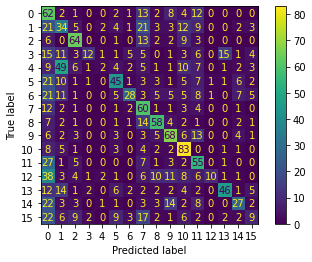

In [9]:
cm_display = ConfusionMatrixDisplay(cm).plot()

# Labelbezeichner: Wordnet

In [10]:
# 1. Load Testset
dt = pd.read_csv(base_path + "/topic_huffpost/wordnet/dev.csv")
labels = dt["label"]
text = dt["text"]

# 2. Load Model
tars = TARSClassifier.load(base_path + "/topic_yin/wordnet/model/best-model.pt")

# 3. Run Test
results = []
classes = [
    "undertake a journey or trip",
    "the practical application of science to commerce or industry",
    "a healthy state of wellbeing free from disease",
    "an adult female person (as opposed to a man)",
    "a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian",
    "a father or mother; one who begets or one who gives birth to or nurtures and raises a child; a relative who plays the role of guardian",
    "the social event at which the ceremony of marriage is performed",
    "the latest and most admired style in clothes and cosmetics and behavior",
    "an activity that is diverting and that holds the attention",
    "a particular branch of scientific knowledge",
    "the legal dissolution of a marriage",
    "an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law",
    "a strong belief in a supernatural power or powers that control human destiny",
    "an active diversion requiring physical exertion and competition",
    "social relations involving intrigue to gain authority or power",
    "light and humorous drama with a happy ending",
]

for sentence in text:
    sequence = Sentence(sentence)

    tars.predict_zero_shot(sequence, classes, multi_label=False)
    print(sequence)
    label = sequence.labels[0].value
    results.append(label)
    print(label)

# 4. Evaluate Results
y_true = labels
y_pred = results

report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)
fisher = f1_score(y_true, y_pred, average="weighted")

2021-07-30 21:38:49,601 loading file /vol/fob-vol7/nebenf19/samahakk/masterarbeit_experiment1/topic_yin/wordnet/model/best-model.pt
init TARS
Sentence: "Bill Clinton : Austerity Ca n't Solve Debt Problem ( VIDEO )"   [− Tokens: 12  − Sentence-Labels: {'label': [the legal dissolution of a marriage (0.4475)]}]
the legal dissolution of a marriage
Sentence: "Learn Investing Tips From Property Transfers"   [− Tokens: 6  − Sentence-Labels: {'label': [the legal dissolution of a marriage (0.5819)]}]
the legal dissolution of a marriage
Sentence: "How Has Women 's Entrepreneurship Day Made a Real Difference ?"   [− Tokens: 11  − Sentence-Labels: {'label': [the latest and most admired style in clothes and cosmetics and behavior (0.5216)]}]
the latest and most admired style in clothes and cosmetics and behavior
Sentence: "This Enlightened CEO Takes Every Friday Off And You Should , Too"   [− Tokens: 12  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil 

Sentence: "Does China Really Have the Most Powerful Economy in the World ?"   [− Tokens: 12  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.2947)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Digital Marketing Will Define Social Media in 2015"   [− Tokens: 8  − Sentence-Labels: {'label': [the social event at which the ceremony of marriage is performed (0.6664)]}]
the social event at which the ceremony of marriage is performed
Sentence: "Religious Groups Fight Obamacare Birth Control Mandate"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.3862)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Fadi C

Sentence: "The Art of Storytelling - 7 Lessons From Cartoonist Liza Donnelly"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6072)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Change Within to Create Change on the Outside"   [− Tokens: 8  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.7006)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "How to Tell a Transportable Story in a Thank You Card"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a rela

Sentence: "Companies ' Doing the Right Thing ' -- For Young Employees With Cancer"   [− Tokens: 13  − Sentence-Labels: {'label': [the social event at which the ceremony of marriage is performed (0.4963)]}]
the social event at which the ceremony of marriage is performed
Sentence: "A Hundred Billion Here , a Hundred Billion There"   [− Tokens: 9  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.8785)]}]
a particular branch of scientific knowledge
Sentence: "Customer Loyalty Management Via the Customer Service Silo"   [− Tokens: 8  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6016)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "More Santa Clauses Unemployed This Holiday Season ( VIDEO )"   [− Tokens: 10  − Sentence-Labels: {'label': [an activ

Sentence: "How To Stop The Tragic Loss Of Beer On St. Patrick 's Day"   [− Tokens: 13  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.585)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "' The Babysitters Club ' Meets ' Girls' And The Results Are Anything But Wholesome"   [− Tokens: 15  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8162)]}]
an activity that is diverting and that holds the attention
Sentence: "Twitter Has Some Harsh Reactions To Kim Kardashian And Kanye West 's New Baby Name"   [− Tokens: 15  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.938)]}]
an activity that is diverting and that holds the attention
Sentence: "This Is How Dumb Undecided Voters Seem At This Poi

Sentence: "Stephen Colbert Issues A Stark Warning To Omarosa About Life After Trump"   [− Tokens: 12  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9959)]}]
an activity that is diverting and that holds the attention
Sentence: "' Vacation Jason ' of ' The Chris Gethard Show ' Drops New Single , Banana Peels at AOL"   [− Tokens: 19  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9965)]}]
an activity that is diverting and that holds the attention
Sentence: "Jason Segel Settles The Greatest Debate Of Our Time"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5894)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Twitter Responds To Kellyanne Conway ’s Latest Spin And It ’

Sentence: "Reporter ' Erect ' Blooper : 7 News Sydney 's Talitha Cummins' Adorable Freudian Slip ( VIDEO )"   [− Tokens: 18  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.7942)]}]
an activity that is diverting and that holds the attention
Sentence: "Cable News Chyrons Tell The Bizarre Story Of Trump 's First Year In Office"   [− Tokens: 14  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.4315)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Saturday 's Morning Email : Funnies Edition"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.7111)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays th

Sentence: "Kate McKinnon 's Creepy Kellyanne Conway Goes Fatal Attraction On ' SNL '"   [− Tokens: 13  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9963)]}]
an activity that is diverting and that holds the attention
Sentence: "Twitter Is Buzzing With Donald Trump ' Space Alien ' Rumors"   [− Tokens: 11  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.4958)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "' Beer ! The Musical ! ' Is The Comedy Extravaganza These Bar Goers Were n't Expecting"   [− Tokens: 17  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9839)]}]
an activity that is diverting and that holds the attention
Sentence: "If Your Partner Gave You A Survey To Fill Out After Sex"   [− Tokens: 12  − Sentence-Labels: {'label': [a father 

Sentence: "Mom Says She Pulled Gun On Teens Threatening Her Son"   [− Tokens: 10  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5784)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "5 Ways the IRS Scammers Could Have Stolen All Those Tax Returns"   [− Tokens: 12  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.5163)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Oklahoma Woman Beheaded By Fired Coworker : Cops"   [− Tokens: 8  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6172)]}]
a father or mo

Sentence: "' Officer Slam ' Threw Teen From Her Desk Over Cellphone , Lawyer Says"   [− Tokens: 14  − Sentence-Labels: {'label': [the social event at which the ceremony of marriage is performed (0.7056)]}]
the social event at which the ceremony of marriage is performed
Sentence: "Jury To Weigh If Pulse Shooter ’s Widow Is A Monster Or Just Married One"   [− Tokens: 15  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9836)]}]
an activity that is diverting and that holds the attention
Sentence: "Man Brought Gun To School Shooting , Wanted To Protect Sister"   [− Tokens: 11  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.601)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Drunk American Airlines Pilot Arrested Right Before His Flight"   [− Tokens: 9  − Sentence-Labels: {'label': [a father 

Sentence: "9 Terrifying American Murder Houses"   [− Tokens: 5  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.5426)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Even Prison Officials Want To Curb Solitary Confinement"   [− Tokens: 8  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5949)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Texas Executes Adam Ward , Man Who Killed City Worker"   [− Tokens: 10  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.5814)]}]
an act punishable by law; usually considered an evil act an evil a

Sentence: "Alexa Vega Finalizes Her Divorce From Producer Sean Covel"   [− Tokens: 9  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9961)]}]
an activity that is diverting and that holds the attention
Sentence: "Blended Family Friday : Meet Anessa And Keith 's Family"   [− Tokens: 10  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.746)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "When To Date After Divorce ?"   [− Tokens: 6  − Sentence-Labels: {'label': [the legal dissolution of a marriage (0.7123)]}]
the legal dissolution of a marriage
Sentence: "Divorce Diaries : Home Is Where You Wake Up Happy"   [− Tokens: 10  − Sentence-Labels: {'label': [the legal dissolution of a marriage (0.8003)]}]
the legal dissolution of a marri

Sentence: "Divorce Diaries : Reinventing Divorce"   [− Tokens: 5  − Sentence-Labels: {'label': [the legal dissolution of a marriage (0.8439)]}]
the legal dissolution of a marriage
Sentence: "Ex Lessons : Tweeters Share Lessons Learned From Their Exes"   [− Tokens: 10  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.7173)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Lauren Silverman , Andrew Silverman Reach Divorce Settlement"   [− Tokens: 8  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9753)]}]
an activity that is diverting and that holds the attention
Sentence: "Cheating Husband : Wife Gets Creative Revenge ( PHOTO )"   [− Tokens: 10  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth

Sentence: "Are You Your Own Worst Enemy ?"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6483)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Divorce , the Musical"   [− Tokens: 4  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9944)]}]
an activity that is diverting and that holds the attention
Sentence: "Mother 's Day Gifts For Single Moms : 21 Gifts Every Single Mom Needs"   [− Tokens: 14  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.7556)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "J

Sentence: "Charlize Theron Explains How Her Mom Became Her Weed Dealer"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9635)]}]
an activity that is diverting and that holds the attention
Sentence: "Jenna Fischer Says She Has n't Been Approached About ' The Office ' Revival"   [− Tokens: 14  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.99)]}]
an activity that is diverting and that holds the attention
Sentence: "Taylor Swift Recalls Feeling ' Stunned ' And ' Violated ' After Alleged Groping Incident"   [− Tokens: 15  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9981)]}]
an activity that is diverting and that holds the attention
Sentence: "Charlize Theron Jokes About Recent Weight Gain During amfAR Gala"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.796)]}]
an activity that

Sentence: "These Title Ideas For The ' Game Of Thrones' Spinoffs Are Pure Dragon Fire"   [− Tokens: 14  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.865)]}]
an activity that is diverting and that holds the attention
Sentence: "The Star Power Of This Beyoncé-Mariah Carey Photo Will Blind You"   [− Tokens: 11  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9981)]}]
an activity that is diverting and that holds the attention
Sentence: "Britney Spears' New Album : What We Know So Far Finds Singer Hiring Vocal Coach , Boasting Major Collaborations"   [− Tokens: 19  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9993)]}]
an activity that is diverting and that holds the attention
Sentence: "The 7 Best Netflix Shows And Movies Debuting May 2018"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9682)]}

Sentence: "Pitchfork Music Festival : Up Close ( PHOTOS )"   [− Tokens: 9  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9989)]}]
an activity that is diverting and that holds the attention
Sentence: "The Pot Baron of Reality Television"   [− Tokens: 6  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9787)]}]
an activity that is diverting and that holds the attention
Sentence: "Norman Reedus Shows Off His Crossbow Skills Against Jimmy Fallon"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9638)]}]
an activity that is diverting and that holds the attention
Sentence: "Patton Oswalt Reveals Wife Michelle McNamara 's Cause Of Death"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9785)]}]
an activity that is diverting and that holds the attention
Sentence: "Here 's Something Easy Y

Sentence: "Being Calm and Mindful for Your Child"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6938)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "You Did Not Lose a Thing"   [− Tokens: 6  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6839)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "9 Things I 'm Not Grateful For As A New Mom"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.7094)]}]
a father or 

Sentence: "How Anxiety Affects Your Child 's Self-Esteem"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6341)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "8-Year-Old Writes Letter Requesting A Park Swing For Brother With Disabilities"   [− Tokens: 11  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.7532)]}]
an activity that is diverting and that holds the attention
Sentence: "6 Reasons Why Making Friends With Kids Is a Real Accomplishment"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6425)]}]
a father or mother; one who begets or one who gives birth to or nurtures and ra

Sentence: "Love Yourself Like Willow and Jaden Love Willow and Jaden"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8626)]}]
an activity that is diverting and that holds the attention
Sentence: "Top 10 Nanny State Fails of 2014"   [− Tokens: 7  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8539)]}]
an activity that is diverting and that holds the attention
Sentence: "This Database Is Filled With 1,300 Diverse Books For Kids"   [− Tokens: 10  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6618)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Lena Headey Had Postpartum Depression Her First Year On ' Game Of Thrones'"   [− Tokens: 13  − Sentence-Labels: {'label': [a

Sentence: "' Unite The Right ' Organizer Flees His Press Conference In Charlottesville"   [− Tokens: 12  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.547)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Protecting Trump Tower Cost New York City $ 308,000 A Day"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.4231)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Supreme Court Sides With Democrats In Challenge To Virginia 's Racially Drawn Districts"   [− Tokens: 13  − Sentence-Labels: {'label': [a father or mother; one who begets or one 

Sentence: "Alabama Mayor And City Councilor Brawl , End Up In Hospital"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5927)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Is Trump ’s Support A ' Basket Of Deplorables ' ?"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5403)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Amid Zika Crisis , House GOP Proposes Eliminating Birth Control Program"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and rais

Sentence: "Flag That Flew Over Capitol On 9 / 11 Destroyed In Flight 93 Memorial Fire"   [− Tokens: 15  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.7303)]}]
an activity that is diverting and that holds the attention
Sentence: "Why Bernie Sanders Is Best on Women 's Issues"   [− Tokens: 9  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.3354)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "The White House Creates ' Letters To President Obama ' Tumblr"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5835)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "My

Sentence: "16 Tweets That Capture Why Some Christians Feel Betrayed After The Election"   [− Tokens: 12  − Sentence-Labels: {'label': [a strong belief in a supernatural power or powers that control human destiny (0.4829)]}]
a strong belief in a supernatural power or powers that control human destiny
Sentence: "How The Grieving Are Turning To New Traditions For The Holidays"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5544)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "The Remarkable Spiritual Wisdom Of Ned Flanders From ' The Simpsons'"   [− Tokens: 11  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9799)]}]
an activity that is diverting and that holds the attention
Sentence: "How to Be Free in Faith Ins

Sentence: "Daily Meditation : Be Still"   [− Tokens: 5  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6678)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Obama Rejects Iran Deal Critics' Charges Of Anti-Semitism"   [− Tokens: 8  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.3789)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "At Mexico-U.S. Border , Pope Francis Decries Suffering of Migrants"   [− Tokens: 10  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5921)]}]
a father or mother; one who 

Sentence: "Pope Francis and the Catholic Crisis"   [− Tokens: 6  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.5192)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Compulsory Love : What the Building of the Tabernacle Can Teach Us About Valentine 's Day ( Parshat Terumah , Exodus 25:1-27:19 )"   [− Tokens: 23  − Sentence-Labels: {'label': [a strong belief in a supernatural power or powers that control human destiny (0.4645)]}]
a strong belief in a supernatural power or powers that control human destiny
Sentence: "9 / 11 , Pearl Harbor And Christianity"   [− Tokens: 8  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5482)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a chi

Sentence: "Diffused Congruence Podcast : Professor Zareena Grewal on Islam is a Foreign Country"   [− Tokens: 13  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8762)]}]
an activity that is diverting and that holds the attention
Sentence: "The Religion of Blood"   [− Tokens: 4  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5715)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "The Pope of Two Minds Disillusions Us"   [− Tokens: 7  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.542)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Muhammad as Spirit of Truth : A Christian 

Sentence: "Bill Nye Is ' Open-Minded But Skeptical ' About Elon Musk 's Bold New Vision For Mars"   [− Tokens: 17  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8861)]}]
an activity that is diverting and that holds the attention
Sentence: "Scientists May Have Figured Out The Best Hand-Sanitizing Technique"   [− Tokens: 9  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9016)]}]
a particular branch of scientific knowledge
Sentence: "High-Speed Camera Captures Amazing Downward And Upward Lightning"   [− Tokens: 8  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9047)]}]
a particular branch of scientific knowledge
Sentence: "Why Wild Turkeys Hate The Wild"   [− Tokens: 6  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.6896)]}]
a particular branch of scientific knowledge
Sentence: "Scientists Discover Feathered Dinosaur Tail Trapped in Amber"   [− Tokens: 8 

Sentence: "Mysterious Light Seen Near Huge Black Hole"   [− Tokens: 7  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.8519)]}]
a particular branch of scientific knowledge
Sentence: "Inner Ear Defect & Hyperactivity Linked In New Study"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6152)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Is Whole Wheat Bread Better Than White ? That May Depend On Your Gut Bacteria ."   [− Tokens: 16  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9181)]}]
a particular branch of scientific knowledge
Sentence: "Scientists Say They 've Created A Freaky New Form Of Light"   [− Tokens: 11  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9674

Sentence: "Bears Can ' Count ' And Compare Numbers , Showing Cognitive Ability , Scientists Say"   [− Tokens: 15  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.8478)]}]
a particular branch of scientific knowledge
Sentence: "Volcanoes On Jupiter 's Moon Io Stump Scientists With Unexpected Distribution & Location ( PHOTO )"   [− Tokens: 16  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.97)]}]
a particular branch of scientific knowledge
Sentence: "Mars Rover Events : When & Where To Watch NASA News Unfold"   [− Tokens: 12  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.4829)]}]
a particular branch of scientific knowledge
Sentence: "How Magic Mushrooms Alter Your Mind Like A Dream"   [− Tokens: 9  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.6501)]}]
a particular branch of scientific knowledge
Sentence: "Stunning Photo Reveals Galaxy 12 Billion Light-Years Away"   [− 

Sentence: "Salary Cap Kings : Dwight Freeney , Peyton Manning Among NFL Players With Largest Cap Number"   [− Tokens: 16  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9997)]}]
an active diversion requiring physical exertion and competition
Sentence: "Freaky Diving Video Is The Greatest GIF From Rio 2016 So Far"   [− Tokens: 12  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9559)]}]
an active diversion requiring physical exertion and competition
Sentence: "' Do n't Cry for Us , Argentina ' as Powerhouse Germany Is First European Team to Win World Cup in the Americas"   [− Tokens: 23  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.998)]}]
an active diversion requiring physical exertion and competition
Sentence: "Cleveland Indians Set Record For Longest Winning Streak In Over A Century"   [− Tokens: 12  − Sentence-Labels: {'label': [an ac

Sentence: "How Mike Piazza Helped Me Come To Terms With Being A Mets Fan"   [− Tokens: 13  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9988)]}]
an active diversion requiring physical exertion and competition
Sentence: "Police Union Decides Against Boycotting San Francisco 49ers Games"   [− Tokens: 9  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9982)]}]
an active diversion requiring physical exertion and competition
Sentence: "Joakim Noah 's Father Was Too Busy Cheering During An Interview With Lisa Salters ( VIDEO )"   [− Tokens: 17  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.695)]}]
an activity that is diverting and that holds the attention
Sentence: "Saints Star Does Not Care About NFL 's New Rule Right Now"   [− Tokens: 12  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9997)]}]
an

Sentence: "Ibtihaj Muhammad And The U.S. Women ’s Fencing Team Win Bronze"   [− Tokens: 11  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9909)]}]
an active diversion requiring physical exertion and competition
Sentence: "Duchess Kate Hits Scotland In A Gorgeous Blue Coat"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6321)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "An Ikea Shopping Bag Hat Exists , No Assembly Required"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8619)]}]
an activity that is diverting and that holds the attention
Sentence: "Nick Jonas' Turtleneck Wins The American Music Awards Red Carpet"   [− Tokens: 10  − Sentence-

Sentence: "Kellyanne Conway Is Wearing A $ 3,600 Coat Studded With ( Ahem ) Cats"   [− Tokens: 14  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9118)]}]
an active diversion requiring physical exertion and competition
Sentence: "This Adorable 4th Grader Is The Best Thing About Fashion Week"   [− Tokens: 11  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6351)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Beauty Legend Bobbi Brown On Why You Should Probably Throw Away Your Sunblock And Skip The Botox"   [− Tokens: 17  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.7445)]}]
an activity that is diverting and that holds the attention
Sentence: "Pimple Nail Art : Deeply Disturbi

Sentence: "I Let My Nana Dress Me And I 've Never Gotten So Many Compliments"   [− Tokens: 14  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6579)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "THIS Is The Most Clever Way To Wear Your Scarves"   [− Tokens: 10  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6822)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Guys , Your New York Fashion Week Has Arrived"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative 

Sentence: "English Country Style 2015"   [− Tokens: 4  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5958)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Jennifer Hudson Looked Incredible Wearing Two Different Looks In One Day"   [− Tokens: 11  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9941)]}]
an activity that is diverting and that holds the attention
Sentence: "Nordstrom Co-President : Business Impact Of Trump 's Tweet Was ' Negligible '"   [− Tokens: 13  − Sentence-Labels: {'label': [the legal dissolution of a marriage (0.475)]}]
the legal dissolution of a marriage
Sentence: "Makeup Artist 's Spectacular Halloween Eye Art Proves The Devil Is In The Details"   [− Tokens: 14  − Sentence-Labels: {'label': [an activity 

Sentence: "Walmart Wants To Test A Drone Delivery Service"   [− Tokens: 8  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6314)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "15 Things Twitter Tells Us About Humanity"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6604)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Here Are 7 Unforgettable Quotes From Nintendo 's Satoru Iwata"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9323)]}]
an activity that is diverting and that hold

Sentence: "iPhone 5 Release Date , iPad Mini And New MacBook Pro : This Week In Apple Rumors"   [− Tokens: 17  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.6725)]}]
an activity that is diverting and that holds the attention
Sentence: "Using Twitter To Save A Newborn From A Flood"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6559)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Facebook 's Mark Zuckerberg Finally Details Fake News Countermeasures"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5941)]}]
a father or mother; one who begets or one who gives birth to or nurtures

Sentence: "Ashley Madison Hackers Speak Out : ' Nobody Was Watching '"   [− Tokens: 11  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9533)]}]
an activity that is diverting and that holds the attention
Sentence: "Time Warner Cable : Internet Outage In The Northeast Fixed"   [− Tokens: 10  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6066)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Interruption-driven Content Consumption"   [− Tokens: 3  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6488)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who pla

Sentence: "New York Tech Scene Rising : NY Tech Meetup"   [− Tokens: 9  − Sentence-Labels: {'label': [the social event at which the ceremony of marriage is performed (0.5844)]}]
the social event at which the ceremony of marriage is performed
Sentence: "Learn To Scuba Dive In Bali ( PHOTOS )"   [− Tokens: 9  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.8076)]}]
an active diversion requiring physical exertion and competition
Sentence: "Paris Is Installing Sparkling Water Fountains Across The City"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6608)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Call of the Wild : 8 Offbeat Places to Connect With Nature"   [− Tokens: 12  − Sentence-Labels: {'label': [a p

Sentence: "The Top 12 Travel Phobias You Probably Have and Do n't Even Realize"   [− Tokens: 13  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.7351)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "4 Reasons to Staycation"   [− Tokens: 4  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.7169)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Eat Well India : Hot Tips On Spicy Cuisine"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guard

Sentence: "5 Amazing Libraries You Must Visit"   [− Tokens: 6  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6196)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Love Letters : Park City"   [− Tokens: 5  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6704)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "PHOTOS : Creepy Abandoned Theme Parks"   [− Tokens: 6  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9925)]}]
an activity that is diverting and that holds the attention
Sentence: "Chilling Out with the Great

Sentence: "Is The Cruise Buffet On Life Support ? ( PHOTOS )"   [− Tokens: 11  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8688)]}]
an activity that is diverting and that holds the attention
Sentence: "Edge of Tomorrow as Spiritual Travel Metaphor"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6277)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "11 Southern Towns You 're Forgetting About But Should n't"   [− Tokens: 10  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6599)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays t

Sentence: "18 Digital Dos And Don'ts For Weddings"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6417)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Wedding Bouquet Inspiration From Real Weddings ( PHOTOS )"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6427)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Online Dating Gone Right : How Amy Webb Hacked The System"   [− Tokens: 11  − Sentence-Labels: {'label': [the social event at which the ceremony of marriage is performed (0.7416)]}]
the social event at which the cere

Sentence: "Obama vs. Romney : The Marriage Proposal Debate"   [− Tokens: 8  − Sentence-Labels: {'label': [the legal dissolution of a marriage (0.5275)]}]
the legal dissolution of a marriage
Sentence: "Conan O'Brien Marriage : Comedian Says He Knew His Wife Was ' The One ' Instantly ( VIDEO )"   [− Tokens: 19  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9813)]}]
an activity that is diverting and that holds the attention
Sentence: "Lauren Conrad 's Engagement Photo Is Just As Perfect As You 'd Expect"   [− Tokens: 13  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9127)]}]
an activity that is diverting and that holds the attention
Sentence: "Biden Wedding : Father-Of-The-Bride Joe Biden Does The Hora"   [− Tokens: 9  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9028)]}]
an activity that is diverting and that holds the attention
Sentence: "Will Pinter

Sentence: "Love Is a Garden"   [− Tokens: 4  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6636)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Cash Bars And The Wrath Of Sober Wedding Guests"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6506)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Wedding Bloopers : 10 Hilarious Wedding Day Fails ( VIDEO )"   [− Tokens: 11  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.957)]}]
an activity that is diverting and that holds the attention
Sentence: "

Sentence: "Yoga Could Boost Prisoners' Mental Health"   [− Tokens: 6  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5901)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Oh Dearism ( Ai n't It Awful )"   [− Tokens: 8  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6972)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "From Up on High : A Movie Review of A Place at the Table"   [− Tokens: 14  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.992)]}]
an activity that is diverting and that holds the attention
Senten

Sentence: "Bacon Harms Male Fertility ? Link Found Between Processed Meat , Semen Quality"   [− Tokens: 13  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.7921)]}]
a particular branch of scientific knowledge
Sentence: "Promoting Independence for Those With Memory Loss"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5615)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "4 Top Weight Loss Scams of the Year ( So Far )"   [− Tokens: 12  − Sentence-Labels: {'label': [an adult female person (as opposed to a man) (0.4849)]}]
an adult female person (as opposed to a man)
Sentence: "5 Spirit Junkie Affirmations for 2014"   [− Tokens: 6  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9966)]}]

Sentence: "Police Sleep : Officers On Night Shift 14 Times More Likely To Be Sleep Deprived"   [− Tokens: 15  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.4256)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Kettlebells : New Go-To Strength Workout For Women ?"   [− Tokens: 9  − Sentence-Labels: {'label': [the social event at which the ceremony of marriage is performed (0.5134)]}]
the social event at which the ceremony of marriage is performed
Sentence: "The No Drama Guide"   [− Tokens: 4  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9817)]}]
an activity that is diverting and that holds the attention
Sentence: "Where Does the Sky Begin ?"   [− Tokens: 6  − Sentence-Labels: {'label': [a particular branch of scientific knowledge (0.9444)]}]
a particular branch of scientific knowledge

Sentence: "Meet The Next Generation Of Inspiring Women"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.5521)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "This Is Why The Beyhive Is Mad At Emma Watson"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.8202)]}]
an activity that is diverting and that holds the attention
Sentence: "Widowhood and the Living Is Easy"   [− Tokens: 6  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6736)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "P

Sentence: "I Had a Boyhood Once , Too"   [− Tokens: 7  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6924)]}]
a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian
Sentence: "Dear Everyone Who Said Ruth Bader Ginsburg Should Retire : You Were Wrong"   [− Tokens: 13  − Sentence-Labels: {'label': [an active diversion requiring physical exertion and competition (0.9698)]}]
an active diversion requiring physical exertion and competition
Sentence: "In Praise Of Adele , My Fat , Flawless Heroine"   [− Tokens: 10  − Sentence-Labels: {'label': [an activity that is diverting and that holds the attention (0.9987)]}]
an activity that is diverting and that holds the attention
Sentence: "' Fifty Shades of Grey ' -- From the Personal to the Political"   [− Tokens: 13  − Sentence-Labels: {'label': [a fa

Sentence: "Wendy Davis On Gun Violence : ‘ Women Are Uniquely Vulnerable’"   [− Tokens: 11  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.4707)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "What Scalia 's Death Means for Abortion Rights In This Country"   [− Tokens: 11  − Sentence-Labels: {'label': [an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law (0.3898)]}]
an act punishable by law; usually considered an evil act an evil act not necessarily punishable by law
Sentence: "Daily Mail Hits Another Low With Sexist Front Page"   [− Tokens: 9  − Sentence-Labels: {'label': [a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian (0.6406)]}]
a father or mother; one who begets or one who gives birth to or n

/vol/fob-vol7/nebenf19/samahakk/.environments/nlp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/vol/fob-vol7/nebenf19/samahakk/.environments/nlp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/vol/fob-vol7/nebenf19/samahakk/.environments/nlp/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [11]:
print(report)

                                                                                                                                        precision    recall  f1-score   support

 a father or mother; one who begets or one who gives birth to or nurtures and raises a child a relative who plays the role of guardian       0.10      0.60      0.18       105
a father or mother; one who begets or one who gives birth to or nurtures and raises a child; a relative who plays the role of guardian       0.50      0.01      0.02       107
                                                                                        a healthy state of wellbeing free from disease       0.67      0.02      0.04        89
                                                                                           a particular branch of scientific knowledge       0.62      0.63      0.63       114
                                                          a strong belief in a supernatural power or powers that contro

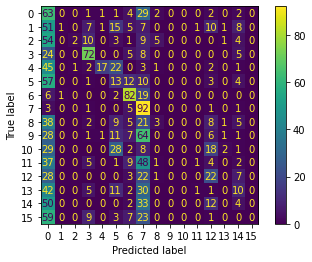

In [12]:
cm_display = ConfusionMatrixDisplay(cm).plot()